C:\Users\SHUBH\AppData\Local\Temp\ipykernel_12696\4161324342.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Office_Supplies['Order Date']=pd.to_datetime(Office_Supplies['Order Date'])


(48,)
(36,)
(12,)


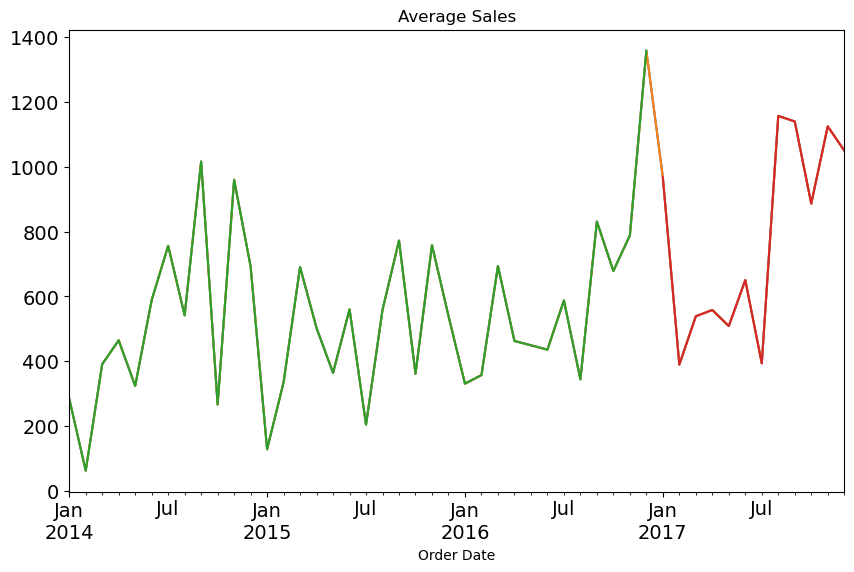

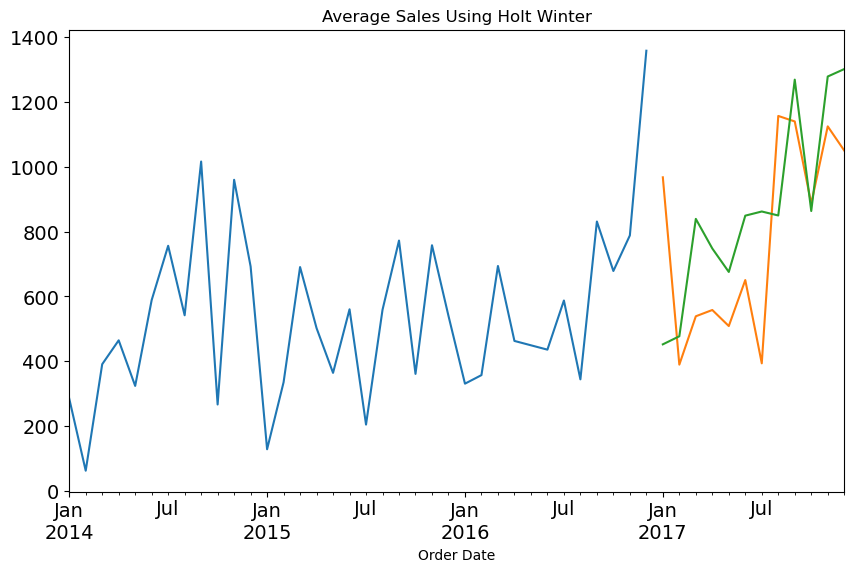

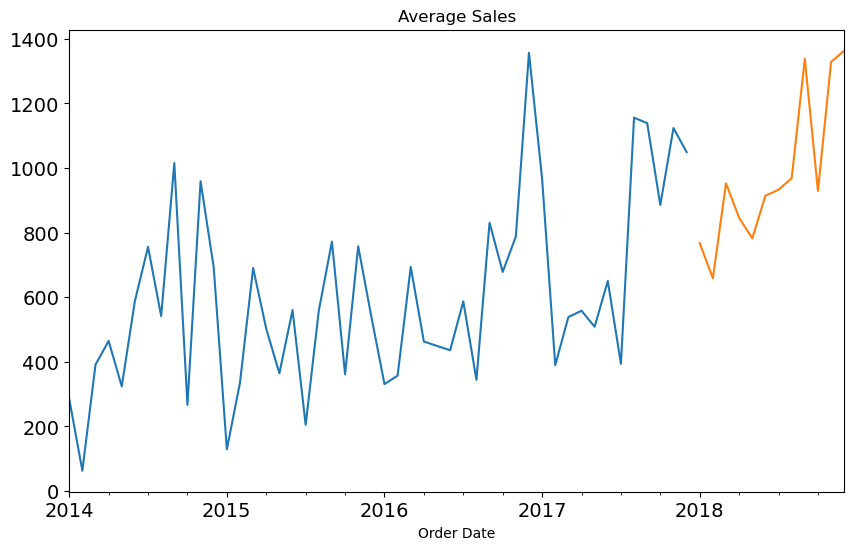

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
! pip install xlrd
#Importing data
df=pd.read_excel(r"Sample_Superstore.xls",header=0)
#printing head
df.head()
df
df.shape
df["Category"].value_counts()
Office_Supplies = df[df["Category"]=="Office Supplies"]
Office_Supplies.shape
Office_Supplies.dtypes
#Coverting in date and time
Office_Supplies['Order Date']=pd.to_datetime(Office_Supplies['Order Date'])
Office_Supplies['Order Date'].min(), Office_Supplies['Order Date'].max()
Office_Supplies=Office_Supplies[['Order Date','Sales']]
Office_Supplies.shape
Office_Supplies
Office_Supplies = Office_Supplies.sort_values('Order Date',ascending=True)
Office_Supplies.isnull().sum()
Office_Supplies.head(10)
Office_Supplies.tail(10)
Office_Supplies['Order Date'].value_counts()
Office_Supplies=Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies.shape
Office_Supplies
Office_Supplies=Office_Supplies.set_index('Order Date')
Office_Supplies
y=Office_Supplies['Sales'].resample("M").mean()
print(y.shape)
y
y.plot(figsize=(10,6))
plt.show
train=y.loc[ :'2016-12-31']
print(train.shape)
train
test=y.loc['2017-01-31':]
print(test.shape)
test
y.plot(figsize=(10,6))
plt.show
#data plotting
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()
#HOLT WINTER MODEL
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df=test.copy()
#smoothing level gamma
#values should be between 0 to 1
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train, seasonal_periods=12, trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter']=fit1.forecast(steps=len(test))                
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6),title='Average Sales Using Holt Winter',fontsize=14)
plt.show()
    
    
    
#UPCOMING YEAR
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df=test.copy()
#smoothing level gamma
#values should be between 0 to 1
    #values close to 0 indicate that older values are very less imp compared to the recent values
    #values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(y, seasonal_periods=12, trend='add',seasonal='add').fit()
    #Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()
Y_predictions.to_excel("TimeSeriesOutputOfficeSupplies.xlsx",index=True)
